# Imports

In [3]:
import clr
import sys
import System
import csv

assembly_path = r".\DLL"
sys.path.append(assembly_path)
ref = clr.AddReference(r"SantecSPA")

import SantecSPA
import matplotlib.pyplot as plt
import numpy as np

spa = SantecSPA.SPAModule()

# List Connected SPA and TSL Devices

In [5]:
status, spaList = spa.GetSpaDeviceList([])
status, tslList = spa.GetTslDeviceList([])

print("SPA Devices:")
for item in spaList:
    print(item)

print()

print("TSL Devices:")
for item in tslList:
    print(item)

SPA Devices:
Dev5

TSL Devices:
2


# Initialize

In [7]:

# Select the SPA and TSL device using information from above
status = spa.Initialize(spaList[0], "USB", 0, int(tslList[0]), " ", 0)
print(status)


0


# Load DSPA File
### A DSPA (SPA Data File) can be loaded and processed using the SDK if not performing live measurements

In [24]:
# replace this to a valid path
status = spa.LoadDSPAFile(r".\data\SDK_Reflection_Port1_30m.dspa")

if (status < 0):
    print("Failed to load DSPA file")
else:
    # print some important settings from the loaded DSPA file
    print(spa.Settings.StartWave)
    print(spa.Settings.StopWave)
    print(spa.Settings.MeasurementMode)
    print(spa.Settings.DistanceRange)
    print(spa.Settings.GaussianFilter)
    print(spa.Settings.GaussianRadius)
    print(spa.Settings.RefractiveIndex)

1260.0
1350.0
0
30.0
False
0.01
1.46


In [12]:
# process and get the Reflectance Measurement Data
status, xArr, yArr = spa.GetReflectanceData([],[])

# write data to csv
            
datafile = "data.csv"

print("Writing scan data to file...")

count = xArr.Length

with open(datafile, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    r = 0
    while r < count:

        x = round(xArr[r], 4)
        y = round(yArr[r], 3)

        csvwriter.writerow([x, y])

        r += 1

# ----------------------------------------------   
 

Writing scan data to file...


# Graph Data from DSPA and Find Peaks

0
2
2
29347.175785279032
30279.98393696369
-68.55535611771987
-73.60832524448044


d:\Work\Ed's Work\Python\Jupyter Notebook\SantecSPA SDK 1.3 Test\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


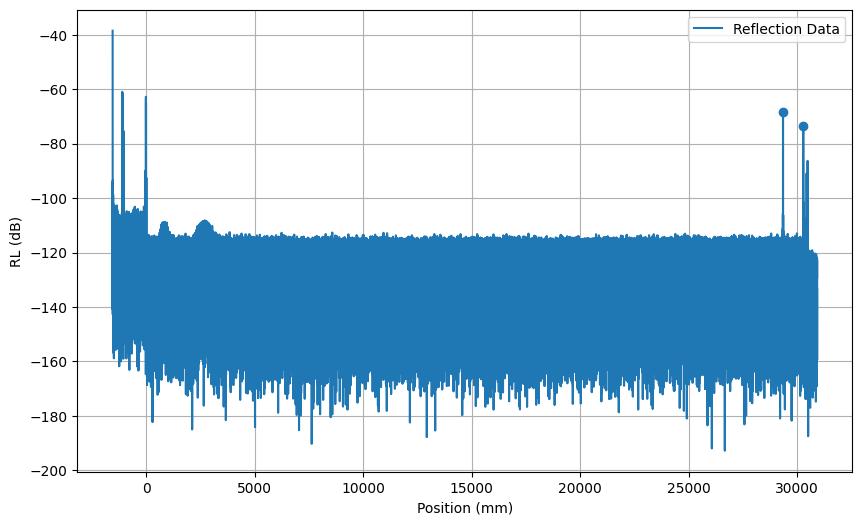

In [ ]:

# set the peak finding settings
spa.SetOperationSettingsValue("PeakThreshold", -80)
spa.SetOperationSettingsValue("PeakWidth", 1.0)

# Get peaks from 0 mm to 5000mm
status, peakPositionList, peakValuesList, peakCount = spa.GetPeaks(0, 40000, [], [])

print(status)
print(peakPositionList.Length)
print(peakValuesList.Length)
for item in peakPositionList:
    print(item)
for item in peakValuesList:
    print(item)

plt.figure(figsize=(10, 6))
plt.scatter(peakPositionList, peakValuesList)
plt.plot(xArr, yArr, label='Reflection Data')
plt.xlabel('Position (mm)')
plt.ylabel('RL (dB)')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

# Load Settings from File

In [ ]:
# load settings from INI file
status = spa.LoadOperationSettingsFromFile(r".\data\Setting.ini")

if (status < 0):
    print("Failed to load settings")
else:
    # print some important settings from the loaded INI file
    print(spa.Settings.StartWave)
    print(spa.Settings.StopWave)
    print(spa.Settings.MeasurementMode)
    print(spa.Settings.DistanceRange)
    print(spa.Settings.GaussianFilter)
    print(spa.Settings.GaussianRadius)
    print(spa.Settings.RefractiveIndex)

# note that if a DSPA file is loaded beforehand, the settings will be replaced with the new settings

1260.0
1350.0
0
5.0
True
0.1
1.46


# Change individual Settings

In [ ]:
spa.SetOperationSettingsValue("StartWave", 1280)
spa.SetOperationSettingsValue("StopWave", 1330)
spa.SetOperationSettingsValue("GaussianFilter", System.Boolean(True))
spa.SetOperationSettingsValue("GaussianRadius", 0.01)
spa.SetOperationSettingsValue("ILWidth", 0.1)
spa.SetOperationSettingsValue("Power", 0)

print(spa.Settings.MeasurementMode) # 0 -> Port 1, 1 -> Port 2, 3 -> Port 1&2 Simultaneous (some SPA devices do not support this), 4 -> IL
print(spa.Settings.StartWave)
print(spa.Settings.StopWave)
print(spa.Settings.SweepSpeed)
print(spa.Settings.GaussianFilter)
print(spa.Settings.GaussianRadius)
print(spa.Settings.Power)

0
1280.0
1330.0
50.0
True
0.01
0.0


# Reference Scan and Graph

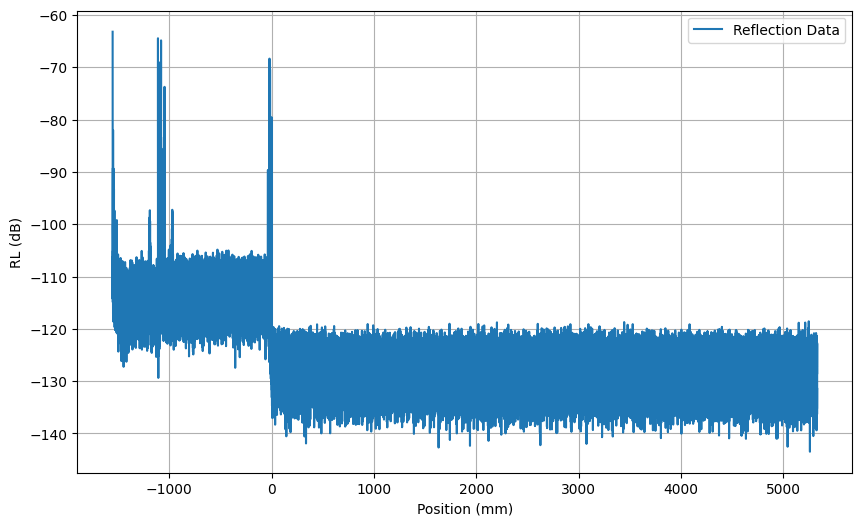

In [ ]:
# Note: disconnect the fiber for reference
# perform a reference scan using the current settings
status, reflectionReference = spa.ExecuteReflectionReference()
status, xValues, yValues = spa.GetReflectanceData([], [], True) # True -> Reference

plt.figure(figsize=(10, 6))
plt.plot(xValues, yValues, label='Reflection Data')
plt.xlabel('Position (mm)')
plt.ylabel('RL (dB)')
plt.legend()
plt.grid(True)
plt.show()


# Find Peaks

-80.0
1.0
0
2
2


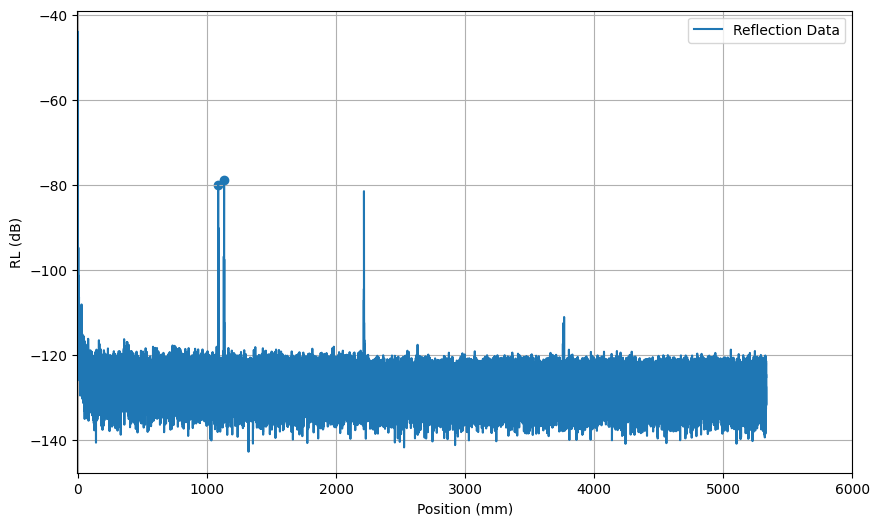

1086.794427287371


In [36]:
# connect the DUT then peform a Peak Scan

spa.SetOperationSettingsValue("PeakThreshold", -80)
spa.SetOperationSettingsValue("PeakWidth", 1.0)
print(spa.Settings.PeakThreshold)
print(spa.Settings.PeakWidth)


# scan from 0 to 6000 m, forward direction (0), first 10 peaks
# This combines the ExecuteReflectionMeasurement and GetPeaks function
status, peakPositionList, peakValuesList = spa.ExecutePeakScan(0, 6000, 0, 10, [], [])

status, xValues, yValues = spa.GetReflectanceData([], [])

print(status)
print(peakPositionList.Length)
print(peakValuesList.Length)

plt.figure(figsize=(10, 6))
plt.scatter(peakPositionList, peakValuesList)
plt.plot(xValues, yValues, label='Reflection Data')
plt.xlabel('Position (mm)')
plt.ylabel('RL (dB)')
plt.legend()
plt.grid(True)
plt.xlim(-5, 6000)
plt.show()

print(peakPositionList[0])



# Measure RL

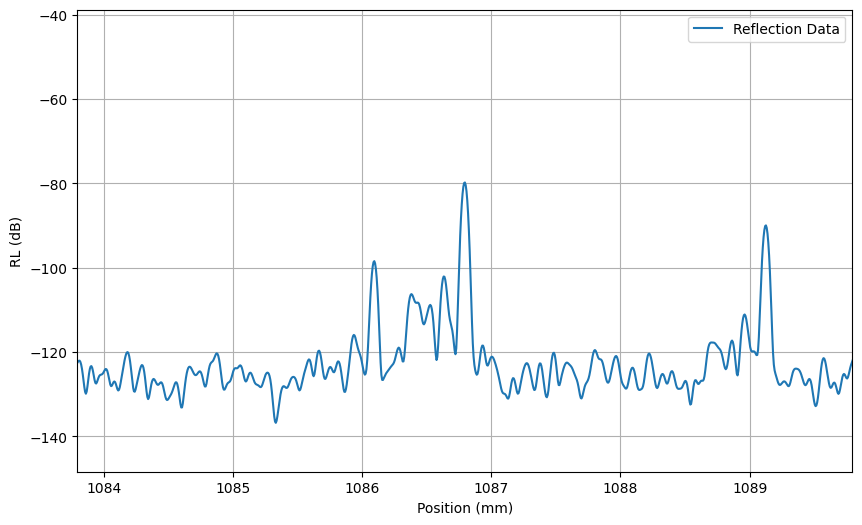

Peak Position: 1086.794427287371
-72.53246521648427
1.4286613204501233


In [46]:
# this scan can be skipped if we already have measurement data
status, xValues, yValues = spa.ExecuteReflectionMeasurement([], [])

# use first peak position from the previous
# measure RL at 1 mm radius around the peak
min = peakPositionList[0] - 1
max = peakPositionList[0] + 1

plt.figure(figsize=(10, 6))
plt.plot(xValues, yValues, label='Reflection Data')
plt.xlabel('Position (mm)')
plt.ylabel('RL (dB)')
plt.legend()
plt.grid(True)
plt.xlim(min - 2, max + 2)
plt.show()

status, rlValue = spa.MeasureRL(min, max)
status, ilValue = spa.MeasureIL(min, max)

print(f"Peak Position: {peakPositionList[0]}")
print(rlValue)
print(ilValue)

# Save to DSPA file

In [ ]:
spa.SaveDSPAFile("Reflection_Scan_5m.dspa")

0

# Transmission Mode Reference

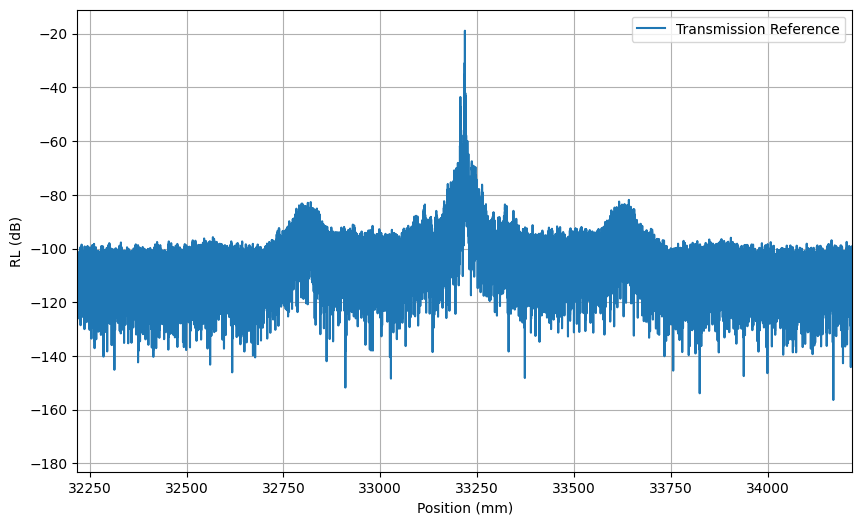

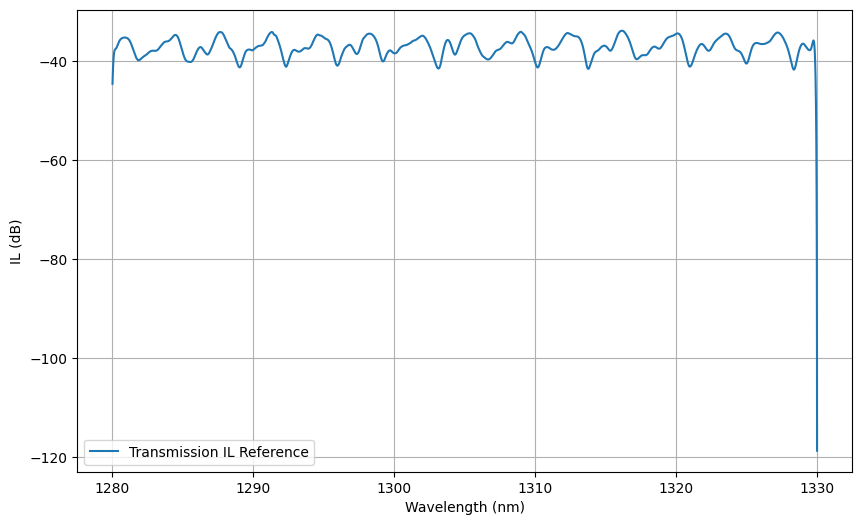

In [47]:
# Reference for 30m
# avaliable values are 5.0, 14.0, and 30.0
spa.SetOperationSettingsValue("DistanceRange", 30.0)

peakPos = 0
status, xValuesWDL, yValuesWDL, peakPos = spa.ExecuteTransmissionReference([], [], peakPos)

#graph around the peakPos
plt.figure(figsize=(10, 6))
plt.plot(xValuesWDL, yValuesWDL, label='Transmission Reference')
plt.xlabel('Position (mm)')
plt.ylabel('RL (dB)')
plt.legend()
plt.grid(True)
plt.xlim(peakPos - 1000, peakPos + 1000)
plt.show()

status, xWDL, yWDL = spa.GetTransmissionWDLData(peakPos - 5, peakPos +5, [], [], System.Boolean(True))

#graph IL around peakPos
plt.figure(figsize=(10, 6))
plt.plot(xWDL, yWDL, label='Transmission IL Reference')
plt.xlabel('Wavelength (nm)')
plt.ylabel('IL (dB)')
plt.legend()
plt.grid(True)
plt.show()

# Transmission Measurement

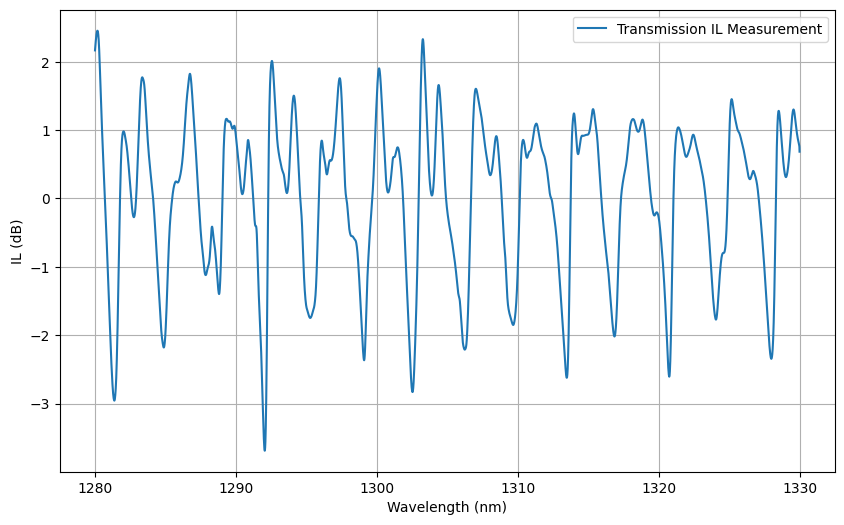

In [49]:
status, xValuesWDL, yValuesWDL = spa.ExecuteTransmissionMeasurement([],[])

status, xWDL, yWDL = spa.GetTransmissionWDLData(peakPos - 5, peakPos +5, [], [], System.Boolean(False))

#graph IL around peakPos
plt.figure(figsize=(10, 6))
plt.plot(xWDL, yWDL, label='Transmission IL Measurement')
plt.xlabel('Wavelength (nm)')
plt.ylabel('IL (dB)')
plt.legend()
plt.grid(True)
plt.show()